#### 1 - Import libraries

In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

#### 2 - Retrieve the names of the 22 files and assign them to a List variable

In [2]:
# retrieve the school files
file_path = os.chdir("/work/data/input_files")
data_files = os.listdir()

# filter out school data files 
csv_files = []

for file in data_files:
    if "MERGED" in file:
        csv_files.append(file)

csv_files

['MERGED2000_01_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2018_19_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2009_10_PP.csv']

#### 3 - Write code to randomly select one file name out of the 22 files names. Display the file name

In [3]:
# randomly select one file 

random_index = random.randrange(len(csv_files))
selected_file =  csv_files[random_index]

print('Selected file:', selected_file)

Selected file: MERGED2005_06_PP.csv


#### 4 - Only read the two columns: college name (INSTNM) and in state tution ("TUITIONFEE_IN")

In [4]:
file = pd.read_csv(selected_file, usecols = ['INSTNM','TUITIONFEE_IN'])
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INSTNM         6899 non-null   object 
 1   TUITIONFEE_IN  4173 non-null   float64
dtypes: float64(1), object(1)
memory usage: 107.9+ KB


#### 5 - Find out how many observations have missing value.


In [5]:
file.isnull().sum()

INSTNM              0
TUITIONFEE_IN    2726
dtype: int64

#### 6 - Drop observations with missing values


In [6]:
file_nan = file.dropna().reset_index(drop = True)
file_nan.shape

(4173, 2)

#### 7 - Find out how many observations have 0 tuition.



In [7]:
file_nan[file_nan['TUITIONFEE_IN'] == 0]

,INSTNM,TUITIONFEE_IN
435,United States Air Force Academy,0.0
1244,United States Naval Academy,0.0
2067,United States Merchant Marine Academy,0.0
2068,United States Military Academy,0.0
2075,Webb Institute,0.0


#### 8 - Drop those observations with 0 tuition. Display the number of observations afterward

In [8]:
clean_file = file_nan[file_nan['TUITIONFEE_IN'] != 0]
clean_file.shape

(4168, 2)

#### 9 - Calculate and display the mean (average) of the tuitions of all the remaining observations


In [9]:
avg_tuition = clean_file['TUITIONFEE_IN'].mean()
avg_tuition

9586.676583493283

#### 10 - Randomly select just 1 observation from the dataframe. Display the tuition of that observation.

In [10]:
school_1 = clean_file.sample()

school_1

,INSTNM,TUITIONFEE_IN
1902,Fulton-Montgomery Community College,3240.0


#### 11 - Calculate the difference between the tuition of this observation and the mean tuition of all observations calculated earlier. Display the difference.

In [11]:
school_1_diff = avg_tuition - float(school_1['TUITIONFEE_IN'])

print('Difference in tutition and average overall tuitions:', round(school_1_diff, 2))

Difference in tutition and average overall tuitions: 6346.68


#### 12 - Repeat 10 to 11 several times get the feel of the size of the difference in means

Example #1

In [12]:
# randomly select a school

school_2 = clean_file.sample()

# calculate difference between tuition and mean tuition of all schools

school_2_diff = abs(avg_tuition - float(school_2['TUITIONFEE_IN']))

print(school_2)
print('Difference in tutition and average overall tuitions:', round(school_2_diff, 2))

                    INSTNM  TUITIONFEE_IN
1051  Southwestern College        16218.0
Difference in tutition and average overall tuitions: 6631.32


Example #2

In [13]:
# randomly select a school

school_3 = clean_file.sample()

# calculate difference between tuition and mean tuition of all schools

school_3_diff = abs(avg_tuition - float(school_3['TUITIONFEE_IN']))

print(school_3)
print('Difference in tutition and average overall tuitions:', round(school_3_diff, 2))

                                         INSTNM  TUITIONFEE_IN
2612  Pennsylvania State University-Main Campus        11508.0
Difference in tutition and average overall tuitions: 1921.32


#### 13 - Randomly select 20 observations, display the tuition of these observation.

In [14]:
schools_1 = clean_file.sample(20)
schools_1

,INSTNM,TUITIONFEE_IN
643,DeVry University-Georgia,12100.0
1322,The New England Institute of Art,17850.0
2127,Gardner-Webb University,16065.0
3601,South Texas College,1586.0
921,Manchester University,19470.0
3248,Viterbo University,16660.0
2859,Austin Community College District,1590.0
858,Waubonsee Community College,1536.0
630,Berry College,17570.0
410,University of Denver,28410.0


#### 14 - Calculate and display the mean tuition of these 20 observations


In [15]:
sample_avg = schools_1['TUITIONFEE_IN'].mean()
print('Average of sample schools tuitions:', sample_avg)

Average of sample schools tuitions: 11328.6


In [16]:
schools_1_diff = abs(avg_tuition - sample_avg)
print('Difference in average of sample tuition and average overall tuition:', round(schools_1_diff, 2))

Difference in average of sample tuition and average overall tuition: 1741.92


#### 16a - Repeat 13 to 15 several times and get the feel of the size of the difference in means 

Example #1

In [17]:
# randomly select 20 schools

schools_2 = clean_file.sample(20)

# calculate average of sample 

sample_avg2 = schools_2['TUITIONFEE_IN'].mean()
sample_avg2

# calculate difference between tuition and mean tuition of all schools

schools_2_diff = abs(avg_tuition - sample_avg2)

print(schools_2)
print('Difference in average of sample tuition and average overall tuition:', round(schools_2_diff, 2))

                                                 INSTNM  TUITIONFEE_IN
1214                    Washington Adventist University        17586.0
1804                    New Mexico Highlands University         2280.0
1494                            Rasmussen College-Eagan        14160.0
3290  Pontifical Catholic University of Puerto Rico-...         4836.0
3793                      Oklahoma Health Academy-Moore         9892.0
1407                               Mid Michigan College         2220.0
2758                     Williamsburg Technical College         2692.0
4142   Minnesota State CollegeSoutheast-Red Wing Campus         4325.0
1913                                   Houghton College        19420.0
863                                 Anderson University        18900.0
923                  Indiana Wesleyan University-Marion        16184.0
3415                 University of Advancing Technology        14600.0
3365                    Sussex County Community College         2670.0
1949  

Example #2

In [18]:
# randomly select 20 schools

schools_3 = clean_file.sample(20)

# calculate average of sample 

sample_avg3 = schools_3['TUITIONFEE_IN'].mean()
sample_avg3

# calculate difference between tuition and mean tuition of all schools

schools_3_diff = abs(avg_tuition - sample_avg3)

print(schools_3)
print('Difference in average of sample tuition and average overall tuition:', round(schools_3_diff, 2))

                                            INSTNM  TUITIONFEE_IN
3723               ITT Technical Institute-Norwood        14196.0
1594                   Missouri Baptist University        13230.0
3070                     Centra College of Nursing         5504.0
3517               Greater Lowell Technical School         4900.0
1665                         Chadron State College         2966.0
2797                         Cumberland University        13344.0
3847                   University of Phoenix-Idaho         9900.0
379                          Berkeley City College          732.0
1424             St Clair County Community College         2292.0
4167      Florida National University-South Campus        10020.0
3275                         University of Wyoming         2874.0
2594      Newport Business Institute-Lower Burrell         9375.0
662                       Gwinnett College-Lilburn         7300.0
909                 Indiana University-Bloomington         7112.0
2456      

#### 16b - Compare these differences with the differences calculated earlier with just 1 observation. Describe your hunch/conclusion.

- The difference between single school and the average tuition of all schools was the highest. 
- The difference between 20 schools and the average tuition of all schools were significantly lower than comparing single tutition. 
- As the number of schools in the sample increased, the differences average tuition of sample schools and average tuition of all schools will decrease. 
- If the sample included all schools listed in the file, the average difference between the sample schools and all schools will be zero.  

Write a function that take two input parameters:

- x (number of observations)
- y (the name of the dataframe).

The function will perform the following:

- Randomly select x observations from y
- Calculate the mean of these x observations
- Calculate the mean of all observations
- Calculate the difference between the two means
- Return the difference

In [21]:
def avg_diff(sample, data):
    all_avg = data.mean()
    random_schools = data.sample(sample)
    random_avg = random_schools.mean()
    diff = abs(all_avg - random_avg)
    print('All Schools:', data, 'Selected Schools:', random_schools, 'Average Difference:', round(float(diff), 2), sep= '\n')    

#### 18 - Test the function by passing a sample size and the name of the dataframe. Display the return of the function

In [22]:
avg_diff(100, clean_file)

All Schools:
                                      INSTNM  TUITIONFEE_IN
0                   Alabama A & M University         4420.0
1        University of Alabama at Birmingham         4792.0
2                         Amridge University        10400.0
3        University of Alabama in Huntsville         4688.0
4                   Alabama State University         4008.0
...                                      ...            ...
4168        Southeastern College-Miami Lakes        11832.0
4169     Southeastern College-St. Petersburg        11832.0
4170  McCann School of Business & Technology         8928.0
4171  McCann School of Business & Technology         8928.0
4172  McCann School of Business & Technology         8928.0

[4168 rows x 2 columns]
Selected Schools:
                                           INSTNM  TUITIONFEE_IN
1003                      William Penn University        15334.0
2943                               Ranger College         1590.0
2808                        J

In [24]:
avg_diff(3000, clean_file)

All Schools:
                                      INSTNM  TUITIONFEE_IN
0                   Alabama A & M University         4420.0
1        University of Alabama at Birmingham         4792.0
2                         Amridge University        10400.0
3        University of Alabama in Huntsville         4688.0
4                   Alabama State University         4008.0
...                                      ...            ...
4168        Southeastern College-Miami Lakes        11832.0
4169     Southeastern College-St. Petersburg        11832.0
4170  McCann School of Business & Technology         8928.0
4171  McCann School of Business & Technology         8928.0
4172  McCann School of Business & Technology         8928.0

[4168 rows x 2 columns]
Selected Schools:
                                                 INSTNM  TUITIONFEE_IN
2061                Tompkins Cortland Community College         3556.0
3935      University of Phoenix-Columbus Georgia Campus        10320.0
2601  Penns

#### 19 - Create a list of sequence numbers from 1 to 50, name it "sample_sizes"; display it to make sure its members are from 1 to 50

In [ ]:
sample_sizes = list(range(1,51))
print(sample_sizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


#### 20 - Create an empty list and name it "means_diff" for differences of population mean and sample means;
##### Loop through the list sample_sizes:
- For each element in the sample size list, obtain a random sample of that size from the data frame;
- Calculate the sample mean 
- Calculate the difference between the population mean and the sample mean
- Append the difference to the list "means_diff"
- Display the list "means_diff" after the loop is completed

In [ ]:
# function to calculate mean 

def calc_avg(input_value):
    avg = sum(input_value) / len(input_value)
    return avg 

In [ ]:
means_diff = []

for ele in sample_sizes:
    sample = random.sample(sample_sizes, ele)
    sample_avg = calc_avg(sample)
    avg_diff = abs(calc_avg(sample_sizes) - sample_avg)
    means_diff.append(round(avg_diff,2))
    
print(means_diff)

[13.5, 12.0, 0.83, 14.0, 6.3, 0.33, 0.64, 1.12, 1.28, 0.2, 1.05, 3.42, 0.19, 1.93, 3.37, 1.88, 3.62, 0.39, 7.39, 2.85, 2.64, 4.91, 5.67, 0.46, 0.38, 0.46, 0.5, 1.64, 1.57, 0.2, 2.89, 0.25, 0.23, 1.12, 1.81, 2.06, 1.72, 0.08, 2.6, 1.15, 0.38, 1.21, 0.24, 0.95, 0.63, 1.04, 0.5, 0.02, 0.19, 0.0]


#### 21 - Make a scatter plot with sample size on the x-axs and  mean difference on the y-axis. Observe as the sample size increases, the sample means converge to the population mean.

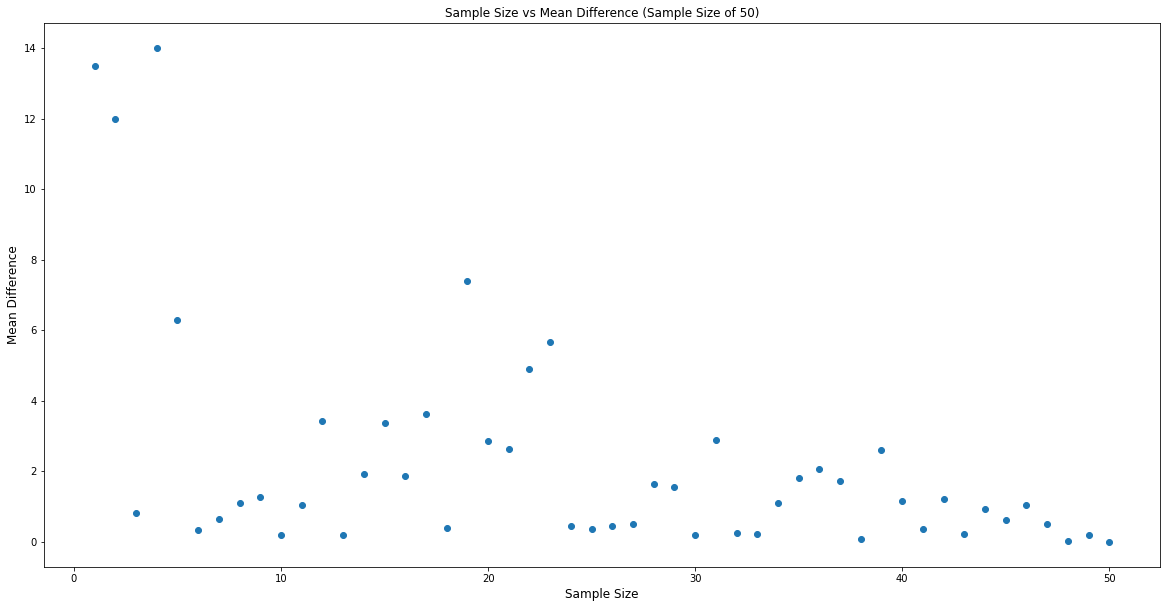

In [ ]:
x = sample_sizes
y = means_diff

plt.rcParams["figure.figsize"] = (20,10)

plt.scatter(x, y)
plt.title("Sample Size vs Mean Difference (Sample Size of 50)", fontsize = 12)
plt.xlabel("Sample Size", fontsize = 12)
plt.ylabel("Mean Difference", fontsize = 12)
plt.show()

#### 22 - repeat 18 to 21 by replacing 50 with a larger number. For example, 300, or even 1000 and see how the plot looks.

Example #1

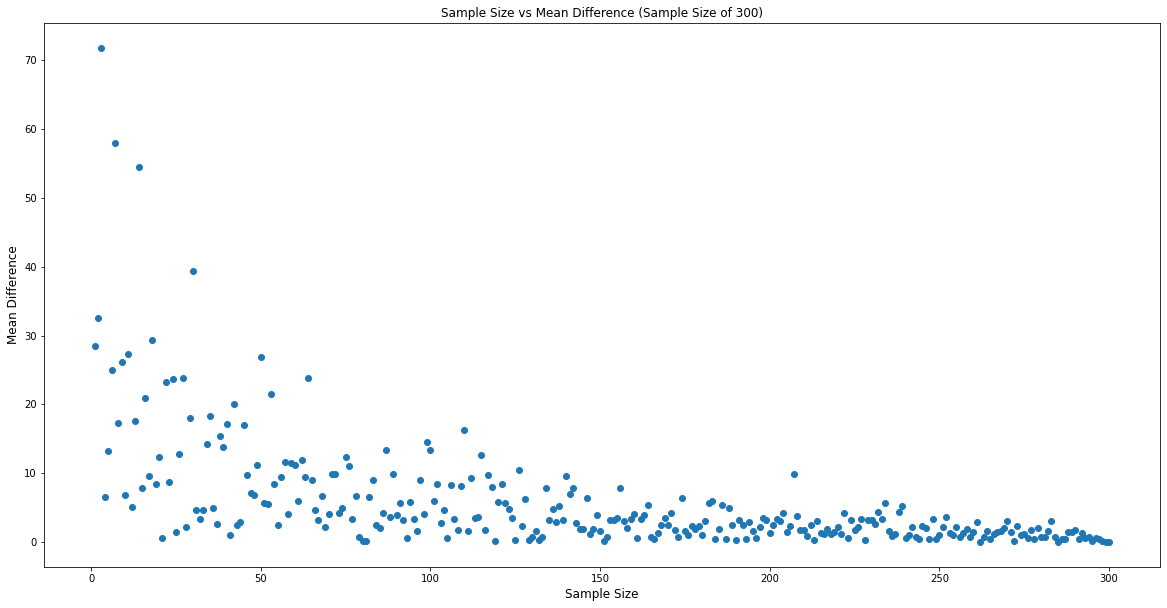

In [ ]:
# sample size of 300

sample_sizes_300 = list(range(1,301))

means_diff_300 = []

for ele_300 in sample_sizes_300:
    sample_300 = random.sample(sample_sizes_300, ele_300)
    sample_avg_300 = calc_avg(sample_300)
    avg_diff_300 = abs(calc_avg(sample_sizes_300) - sample_avg_300)
    means_diff_300.append(round(avg_diff_300,2))
    
x = sample_sizes_300
y = means_diff_300

plt.scatter(x, y)
plt.title("Sample Size vs Mean Difference (Sample Size of 300)", fontsize = 12)
plt.xlabel("Sample Size", fontsize = 12)
plt.ylabel("Mean Difference", fontsize = 12)
plt.show()

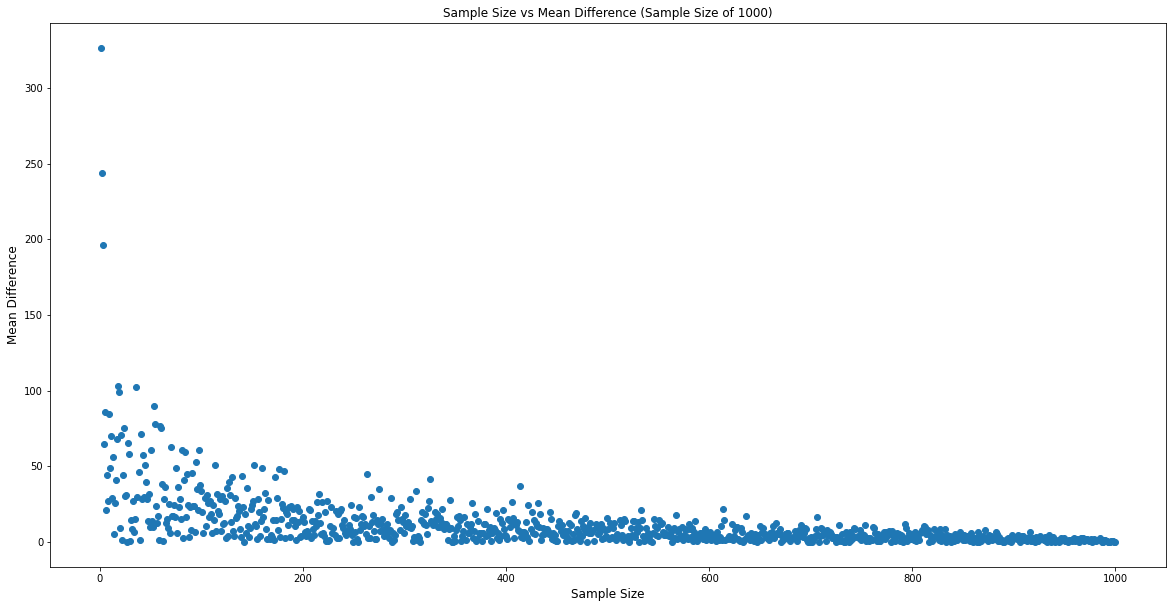

In [ ]:
# sample size of 1000

sample_sizes_1000 = list(range(1,1001))

means_diff_1000 = []

for ele_1000 in sample_sizes_1000:
    sample_1000 = random.sample(sample_sizes_1000, ele_1000)
    sample_avg_1000 = calc_avg(sample_1000)
    avg_diff_1000 = abs(calc_avg(sample_sizes_1000) - sample_avg_1000)
    means_diff_1000.append(round(avg_diff_1000,2))
    
x = sample_sizes_1000
y = means_diff_1000

plt.scatter(x, y)
plt.title("Sample Size vs Mean Difference (Sample Size of 1000)", fontsize = 12)
plt.xlabel("Sample Size", fontsize = 12)
plt.ylabel("Mean Difference", fontsize = 12)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b0a73dad-e3e1-4483-bec0-91e90772d4b2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>